In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("../data/gesture4.txt")

In [3]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


# In, Out, Fist, Goat

In [4]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [57]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(2155, 4)

In [58]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [59]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(4, activation="softmax"))

In [60]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 8, verbose=2)

Train on 1724 samples, validate on 431 samples
Epoch 1/50
 - 0s - loss: 0.4508 - accuracy: 0.7906 - val_loss: 0.3256 - val_accuracy: 0.8724
Epoch 2/50
 - 0s - loss: 0.2925 - accuracy: 0.8765 - val_loss: 0.2406 - val_accuracy: 0.9020
Epoch 3/50
 - 0s - loss: 0.2362 - accuracy: 0.9056 - val_loss: 0.1907 - val_accuracy: 0.9223
Epoch 4/50
 - 0s - loss: 0.1943 - accuracy: 0.9236 - val_loss: 0.1687 - val_accuracy: 0.9397
Epoch 5/50
 - 0s - loss: 0.1832 - accuracy: 0.9308 - val_loss: 0.1550 - val_accuracy: 0.9495
Epoch 6/50
 - 0s - loss: 0.1648 - accuracy: 0.9349 - val_loss: 0.1522 - val_accuracy: 0.9466
Epoch 7/50
 - 0s - loss: 0.1661 - accuracy: 0.9323 - val_loss: 0.1454 - val_accuracy: 0.9495
Epoch 8/50
 - 0s - loss: 0.1582 - accuracy: 0.9397 - val_loss: 0.1484 - val_accuracy: 0.9495
Epoch 9/50
 - 0s - loss: 0.1545 - accuracy: 0.9397 - val_loss: 0.1436 - val_accuracy: 0.9478
Epoch 10/50
 - 0s - loss: 0.1568 - accuracy: 0.9353 - val_loss: 0.1455 - val_accuracy: 0.9484
Epoch 11/50
 - 0s - lo

Text(0.5, 1.0, 'Accuracy')

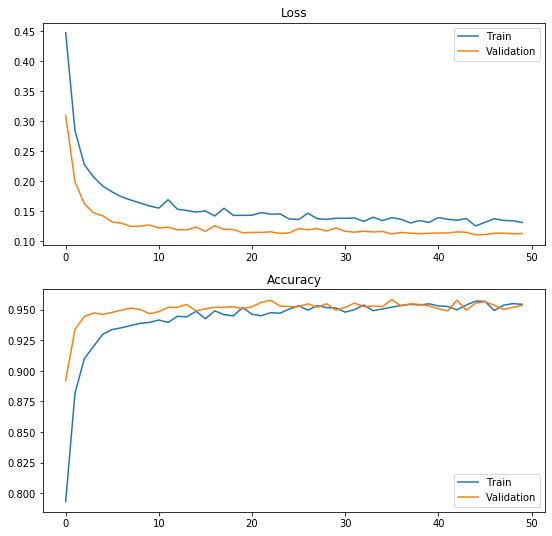

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [15]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 68        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.save("../Data/arduino4gestures.h5")

In [17]:
from tensorflow.keras.models import load_model

In [18]:
model = load_model("../Data/arduino4gestures.h5")

In [19]:
from tinymlgen import port
print(port(model))


#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x64, 0x0f, 0x00, 0x00, 0x8c, 0x0a, 0x00, 0x00, 0x74, 0x0a, 0x00, 0x00, 0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x44, 0xf1, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73, 0x69, 0x6f, 0x6e, 0x00, 0x0d, 0x00, 0x00, 0x00, 0x34, 0x0a, 0x00, 0x00, 0x2c, 0x0a,

## Other methods

In [11]:
import numpy as np

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC(gamma='auto')

In [14]:
clf.fit(X_train, Y_train)

C:\Users\Denis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
clf.score(X_train, Y_train)

0.9118329466357309

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

C:\Users\Denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
neigh.score(X_train, Y_train)

0.9095127610208816

# In, Out, Fist, Point


In [24]:
dataset = pd.read_csv("../data/gesture7.txt")
dataset = dataset.loc[dataset["gesture"].isin([0,1,3,5])]

In [25]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


In [32]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [33]:
Y_train = [int(i) for i in Y_train]
for i in range(len(Y_train)):
    if (Y_train[i]>3) : Y_train[i] = 2
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(2241, 4)

In [34]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [35]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Dropout(0.2))

model.add(Dense(4, activation="softmax"))

In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [37]:
history_new = model.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 8, verbose=2)

Train on 1792 samples, validate on 449 samples
Epoch 1/50
 - 0s - loss: 0.4629 - accuracy: 0.7906 - val_loss: 0.3131 - val_accuracy: 0.8725
Epoch 2/50
 - 0s - loss: 0.2807 - accuracy: 0.8849 - val_loss: 0.2017 - val_accuracy: 0.9310
Epoch 3/50
 - 0s - loss: 0.2155 - accuracy: 0.9177 - val_loss: 0.1652 - val_accuracy: 0.9410
Epoch 4/50
 - 0s - loss: 0.1964 - accuracy: 0.9251 - val_loss: 0.1479 - val_accuracy: 0.9516
Epoch 5/50
 - 0s - loss: 0.1744 - accuracy: 0.9340 - val_loss: 0.1357 - val_accuracy: 0.9560
Epoch 6/50
 - 0s - loss: 0.1677 - accuracy: 0.9369 - val_loss: 0.1318 - val_accuracy: 0.9549
Epoch 7/50
 - 0s - loss: 0.1587 - accuracy: 0.9427 - val_loss: 0.1294 - val_accuracy: 0.9555
Epoch 8/50
 - 0s - loss: 0.1552 - accuracy: 0.9414 - val_loss: 0.1312 - val_accuracy: 0.9566
Epoch 9/50
 - 0s - loss: 0.1544 - accuracy: 0.9421 - val_loss: 0.1279 - val_accuracy: 0.9555
Epoch 10/50
 - 0s - loss: 0.1487 - accuracy: 0.9452 - val_loss: 0.1270 - val_accuracy: 0.9571
Epoch 11/50
 - 0s - lo

Text(0.5, 1.0, 'Accuracy')

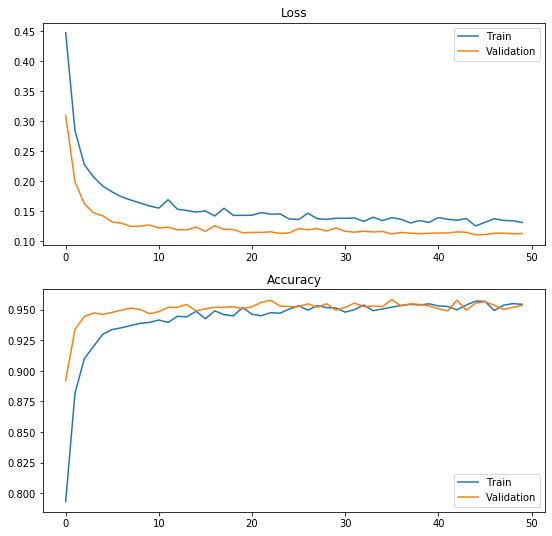

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

## Comparison

Text(0.5, 1.0, 'Accuracy')

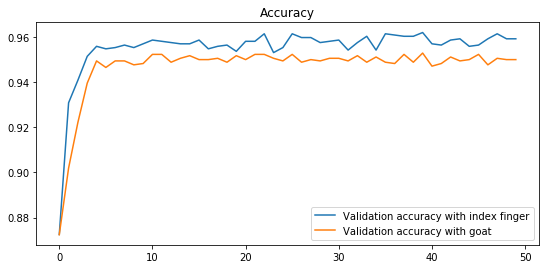

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history_new.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Validation accuracy with index finger","Validation accuracy with goat"])
plt.title("Accuracy")